In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn

# Using the `scipy` Kolmogorov–Smirnov test

A short note on how to use the [`scipy` Kolmogorov–Smirnov test](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) because quite frankly the documentation was not compelling and I always forget how the  `scipy.stats` module handles distributions arguments.

## Set up some test data

Using a `beta` distribution generate `rvs` from it and save them as `d1`, then make a second set of data containing the fist set and 50 drawd from a different distribution: this measn `d2` not `beta`. We plot the Gaussian KDE to show how large the effect is graphically

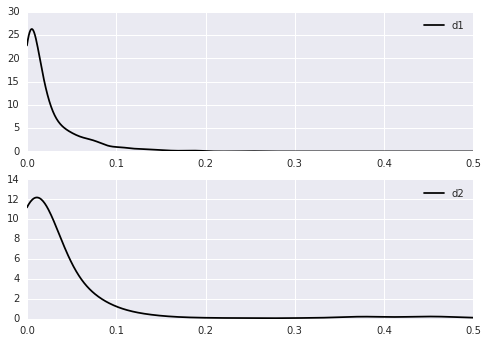

In [65]:
xvals = np.linspace(0, 0.5, 500)

args = [0.5, 20]
d1 = ss.beta.rvs(args[0], args[1], size=1000)
noise = ss.norm.rvs(0.4, 0.1, size=50)
d2 = np.append(d1[:len(d1)-len(noise)], noise)

fig, (ax1, ax2) = plt.subplots(nrows = 2)

ax1.plot(xvals, ss.gaussian_kde(d1).evaluate(xvals), "-k",
         label="d1")
ax1.legend()
ax2.plot(xvals, ss.gaussian_kde(d2).evaluate(xvals), "-k",
         label="d2")
ax2.legend()

plt.show()

## Now compute KS test

The trick here is to give the `scipy.stats.kstest` the data, then a callable function of the cumulative distribution function. There is some clever way to just pass in a string of the name, but I was unconvinved that the argumements were going to the proper place, so I prefer this method

In [66]:
beta_cdf = lambda x: ss.beta.cdf(x, args[0], args[1])
ss.kstest(d1, beta_cdf)

KstestResult(statistic=0.033579161840887828, pvalue=0.20506498391032268)

In [67]:
ss.kstest(d2, beta_cdf)

KstestResult(statistic=0.049395614285257183, pvalue=0.014680697643542961)

## Conclusion

Clearly this works as expected: for `d1` we get a fairly large $p$-value suggesting we should accept the null hypothesis (the data *is* beta-distributed with the given $a$ and $b$, while for $d2$ we get a low $p$-value suggesting we might discard the null hypothesis (which we know to be true since that was the way the data was built). 

It remains unclear how to choose the $p$ threshold.